This notebook is for the smoothing of the raw data found in /net/share/dfco222/data/microglia/motility/ for the purpose of attenuating (decreasing) the amount of noise in the image

In [7]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import ndimage

sys.path = ["../matchedmyo/"] + sys.path
import util

### Read in Raw Image

In [3]:
image_name = "/net/share/dfco222/data/microglia/motility/iso_laser.tif"

img = util.ReadImg(fileName = image_name)

print "Image shape:", np.shape(img)

Image shape: (512, 512, 30)


### Take a look at the first slice of the image

Raw image standard deviation: 8232.987


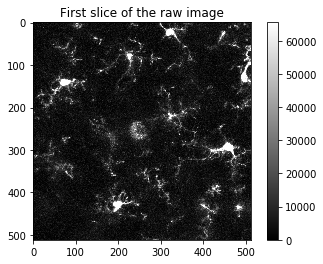

In [15]:
plt.figure()
plt.imshow(img[:,:,0],cmap='gray')
plt.colorbar()
plt.title("First slice of the raw image")

print "Raw image standard deviation:", np.std(img)

### Go through and smooth each slice of the image 

In [8]:
num_slices = img.shape[-1]
print "There are {} slices in the image.".format(num_slices)

smoothing_kernel_shape = (3,3,1)

smoothed_image = ndimage.filters.uniform_filter(img, size = smoothing_kernel_shape)

There are 30 slices in the image.


### Take a look at the smoothed image

Smoothed image standard deviation: 7245.03


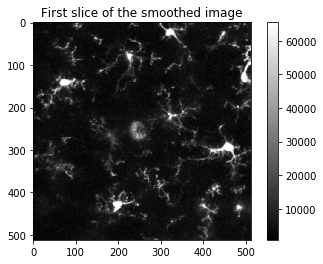

In [16]:
plt.figure()
plt.imshow(smoothed_image[:,:,0],cmap='gray')
plt.colorbar()
plt.title("First slice of the smoothed image")

print "Smoothed image standard deviation:", np.std(smoothed_image)

### Save the image (With an appropriate name!)

In [17]:
# this is important for organization!!!
file_name = "./Images/Microglia/iso_laser_smoothed_3x3x1_kernel.tif"

util.Save3DImg(smoothed_image, fileName = file_name)

Wrote file to: ./Images/Microglia/iso_laser_smoothed_3x3x1_kernel.tif


### Now that we've gotten this to work with one image, let's make a function that will automatically do this for us

# to be done